In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
from collections import Counter
import ast
from plotly.colors import sample_colorscale
import plotly.graph_objects as go
import plotly.colors

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [36]:
MOVIES = pd.read_csv("cleaned_data.csv")
MOVIES.head()

,wikipedia_movie_ID,name,release_date,revenue,runtime,languages,countries,genres,release_year,vote_average,...,Female actor count,Male actor count,N/A actor count,Actors 0-20,Actors 20-30,Actors 30-40,Actors 40-60,Actors 60+,release_decade,plot_length
0,975900,ghosts of mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,5.127,...,6,11,0,0,2,3,7,5,2000.0,202
1,3196793,getting away with murder: the jonbenét ramsey ...,2000-02-16,0.0,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000.0,0.000,...,4,11,0,1,0,1,6,7,2000.0,34
2,13696889,the gangsters,1913-05-29,0.0,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913.0,6.000,...,0,1,0,0,0,0,0,1,1910.0,16
3,10408933,alexander's ragtime band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938.0,6.600,...,2,2,0,0,2,2,0,0,1930.0,49
4,6631279,little city,1997-04-04,0.0,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997.0,3.833,...,4,2,0,0,1,4,1,0,1990.0,121


In [37]:
MOVIES.columns

Index(['wikipedia_movie_ID', 'name', 'release_date', 'revenue', 'runtime',
       'languages', 'countries', 'genres', 'release_year', 'vote_average',
       'vote_count', 'adult', 'budget', 'popularity', 'plot',
       'original_genres', 'new_genres', 'genre_hot', 'death', 'love',
       'tragedy', 'sentiment', 'Character Count', 'Female actor count',
       'Male actor count', 'N/A actor count', 'Actors 0-20', 'Actors 20-30',
       'Actors 30-40', 'Actors 40-60', 'Actors 60+', 'release_decade',
       'plot_length'],
      dtype='object')

In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
unique_genre = list()
MOVIES["new_genres"].apply(lambda x: unique_genre.extend(ast.literal_eval(x)))
unique_genre = Counter(unique_genre)
unique_genre = {k: v for k, v in sorted(unique_genre.items(), key=lambda item: item[1], reverse=True)}
unique_genre["Other"] = 0
for idx, entry in enumerate(unique_genre):
    if idx>15 and entry != 'Other':
        unique_genre['Other'] += unique_genre[entry]
        unique_genre[entry] = 0
unique_genre = {x:y for x,y in unique_genre.items() if y!=0}
unique_genre = pd.DataFrame.from_dict(unique_genre, orient='index')
unique_genre = unique_genre.rename(columns={'index':'genre', 0:'count'})
unique_genre = unique_genre



Wordcloud for genre: Drama


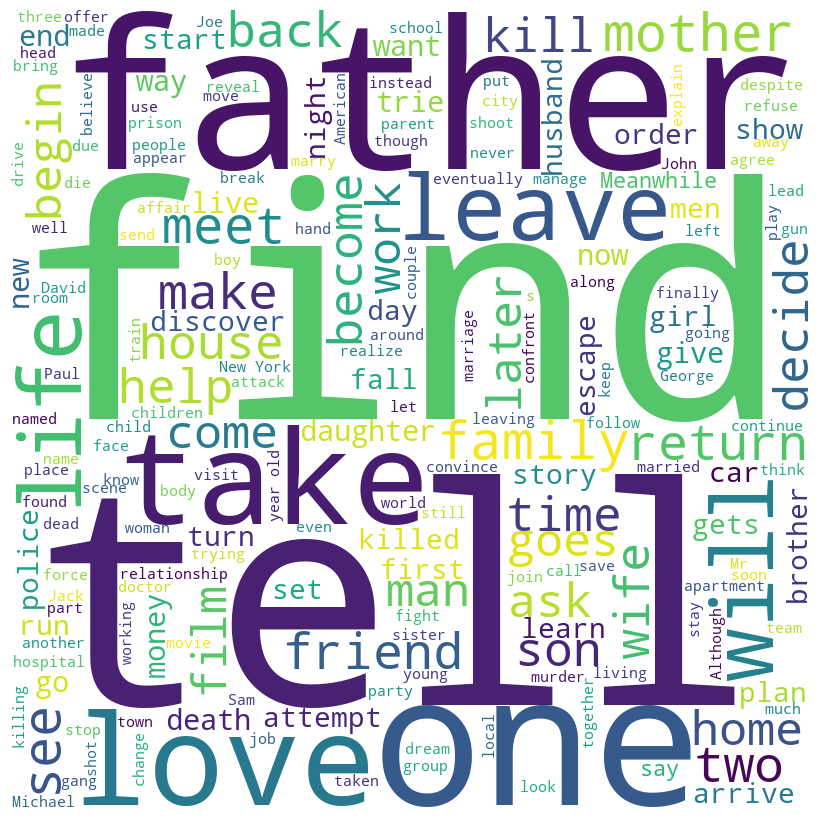

Wordcloud for genre: Comedy


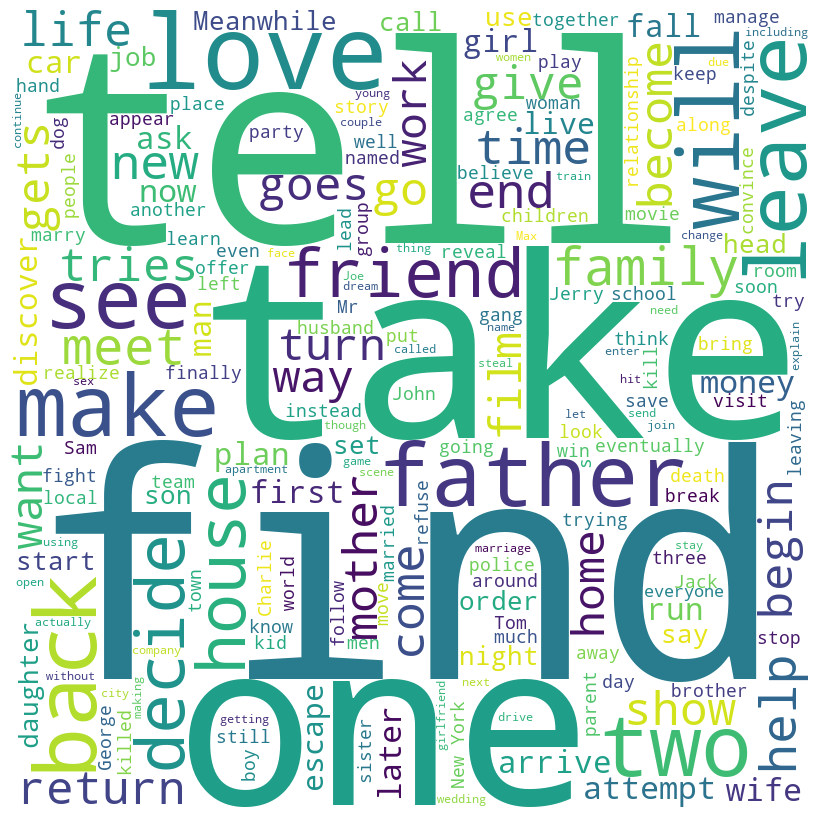

Wordcloud for genre: Action/Adventure


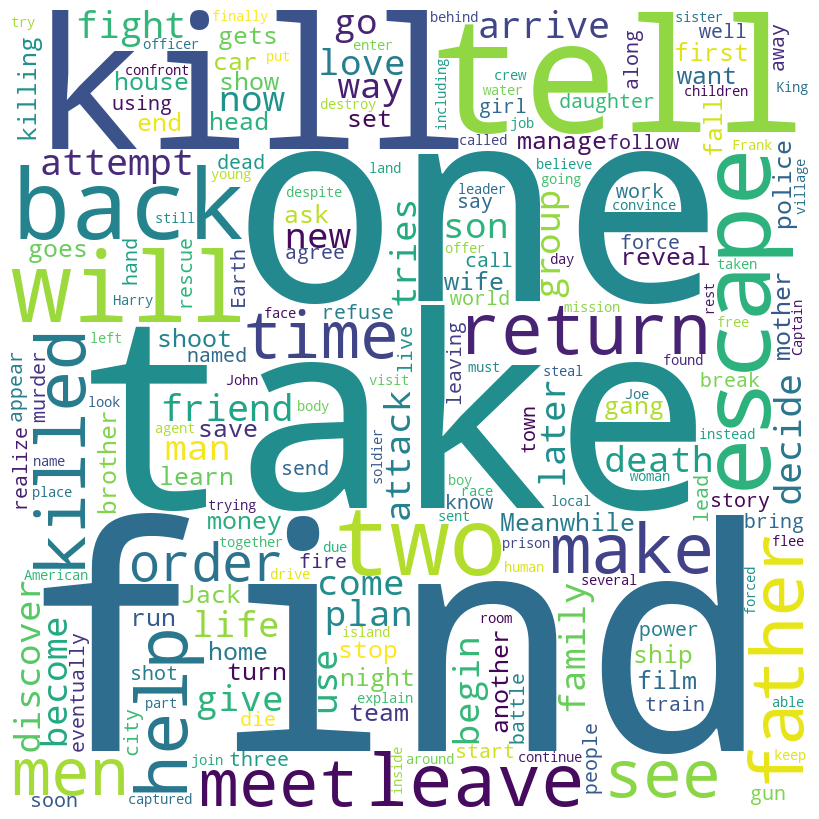

Wordcloud for genre: Romance


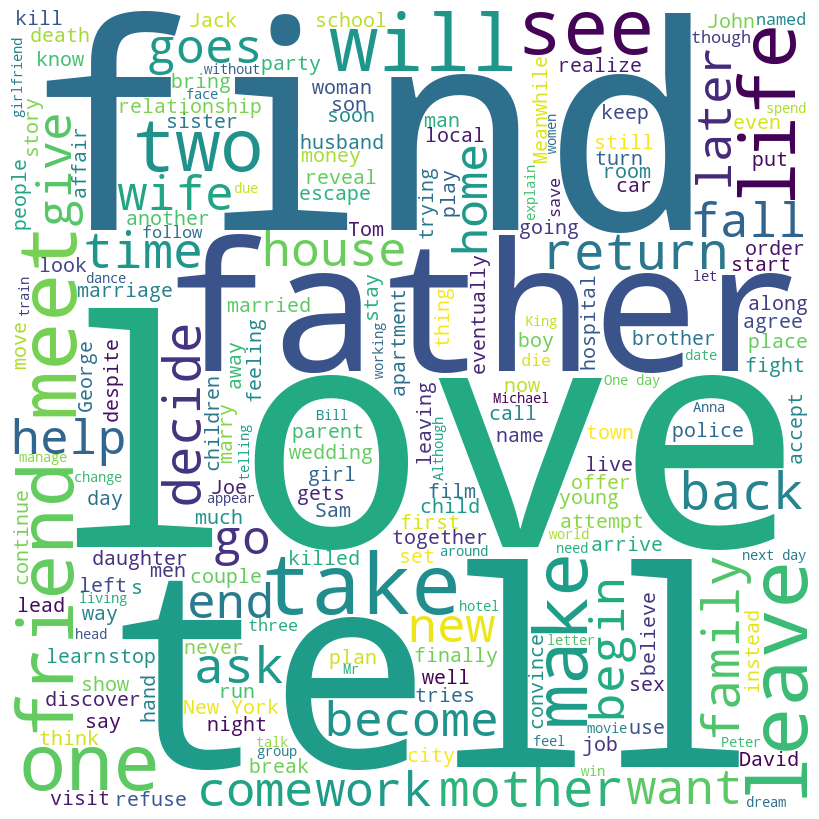

Wordcloud for genre: Old-fashioned/classical style


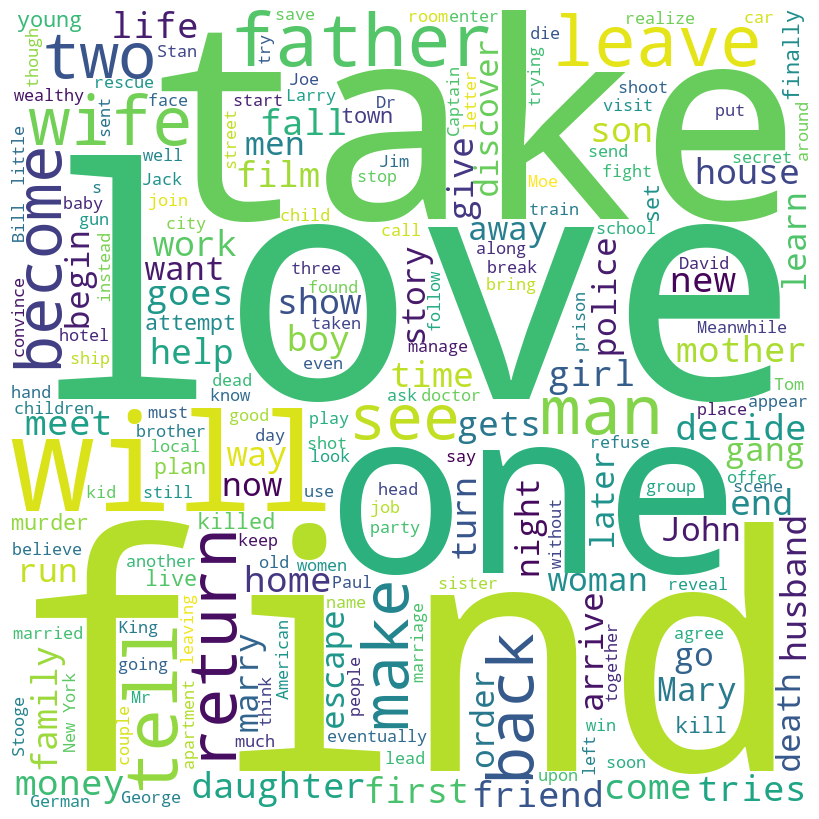

Wordcloud for genre: Thriller


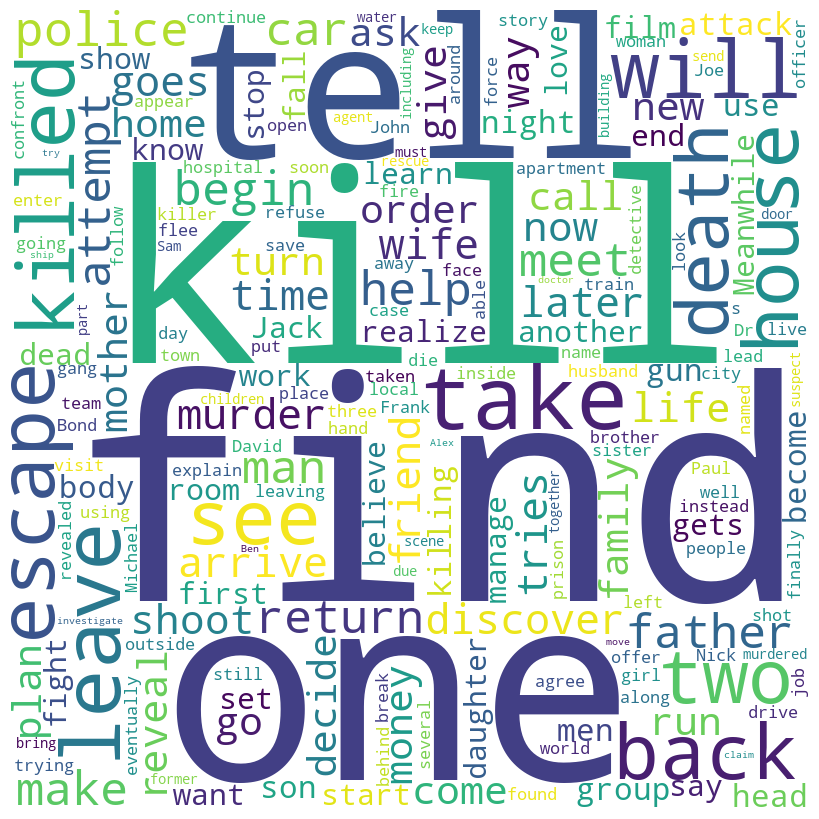

Wordcloud for genre: Crime


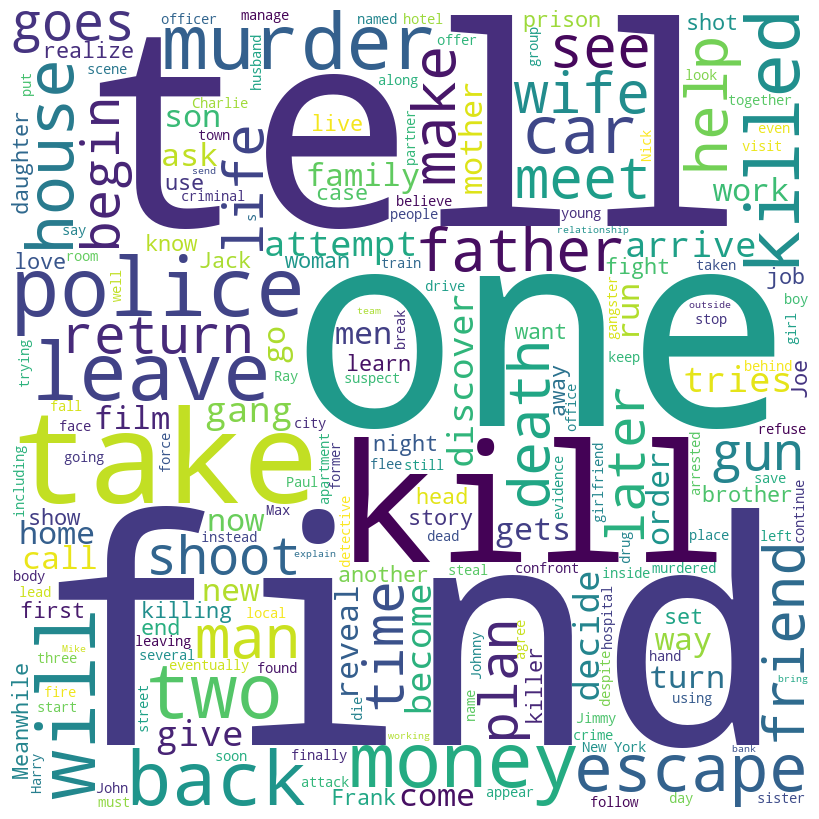

Wordcloud for genre: Indie


In [ ]:
# create the code for the wordcloud
# apply for the column "plot" based on the column "new_genres
# which contains dataset like this; ["new_genres"]
# ['Action/Adventure', 'Horror', 'Science Fiction', 'Supernatural/Monster', 'Thriller', 'Western']
# ['Crime', 'Drama', 'Mystery/Suspense', 'Non-fiction/Educational']
# ['Comedy', 'Indie', 'Old-fashioned/classical style', 'Short Film']
# ['Comedy', 'Music/Dance', 'Old-fashioned/classical style']
# ["plot"] columns is like this
# Set in the second half of the 22nd century, the film depicts Mars as a planet that has been 84% terraformed, allowing humans to walk on the surface without wearing pressure suits. The Martian society has become largely matriarchal, with women in most positions of authority. The story concerns a police officer, Melanie Ballard , second in command of a small team alongside Sergeant Jericho  sent to pick up and transport a prisoner named Desolation Williams . Arriving at the remote mining town where Williams is being held, Ballard finds virtually all of the people missing. She learns that the miners had discovered an underground doorway created by an ancient Martian civilization. When the door was opened it released "ghosts," disembodied spirits which possessed the miners. Violence ensues, as the possessed miners commit horrific acts of death and destruction, as well as self-mutilation. With their team leader Helena Bradock  murdered, Ballard must fight off the attacking miners, escape the town, and destroy the ghosts, if possible. Unfortunately, her intentions are complicated by the fact that killing a possessed human merely releases the Martian spirit to possess another human. The team eventually decides to blow up a nuclear reactor to try and vaporize all of the ghosts. At several points in the film Sergeant Jericho shows a romantic interest in Ballard, mostly unreciprocated. Ballard's crew along with survivors who manage to gather in the jail are eventually wiped out by the miners after many fierce battles and events , leaving only her and Williams after Sergeant Jericho and the other remaining officers and the two operators of the train are killed upon returning from a brief retreat to finish the fight. Not wanting the authorities to blame the massacre on him, he handcuffs Ballard to her cot and escapes from the train, leaving her to return home and deliver her report, which is received with skepticism by her superiors. While Ballard recuperates at a hospital, the released spirits, who weren't destroyed after all, attack the city. The end scene sets the movie up for a sequel as Williams returns to team up with Ballard to fight the possessed.
# Dramatization of the story behind the murder of young JonBenet Ramsey. The program provides a concise view of the events surrounding the murder case, as pieced together by detectives and reporters. While the truth about the murder remains a mystery, the program presents the facts of the case, as well as multiple scenarios of the crime and the theories about the identity of the killer(s).
# An amusing burlesque of gang fighters. The police go after them, one by one, and each guardian of the peace is caught and despoiled of his clothing and compelled to return to the station.
# Classical violinist, Roger Grant disappoints his family and teacher when he organizes a jazz band, but he and the band become successful. Roger falls in love with the band's singer, Stella, but his reluctance to lose her leads him to thwart her efforts to become a solo star. When the World War separates them in 1917, Stella marries Roger's best friend and, when Roger returns home after the war, an important concert at Carnegie Hall brings the corners of the romantic triangle together.
# Adam, a San Francisco-based artist who works as a cab driver on the side, is having a hard time committing to his girlfriend, Nina. She wants to take their relationship to the next level, but he hasn't really gotten over his ex-girlfriend, Kate, who left him for another woman and is reluctant to move forward with Nina because he's still hanging on to the idea that one day Kate will come back to him. Feeling neglected, Nina breaks up with Adam and starts seeing Kevin, a womanizing bartender who is also Adam's best friend. Meanwhile Rebecca, the new girl in town, gets a job in Kevin's bar and begins an affair with Anne, the woman Kate left Adam for. Tired of her infidelities, Kate breaks up with Anne and returns to Adam. However she soon realises that she's not in love with him anymore and breaks up with him for good. Rebecca soon tires of Anne and breaks off their affair. One day she meets Adam, who is finally attempting to move on from Kate once and for all, and they go out on a date. Nina and Kevin's fling turns into something deeper when she finds out that she's pregnant, an event that strains Adam's friendship with Kevin and threatens to ruin his budding relationship with Rebecca before it has a chance to begin.
# TODO
# classify movies accordingly to each genre using "new_genre" column
# Then, create the wordcloud for MOVIE["plot"] culumn based on the genre
 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(data):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(data)
    plt.figure(figsize = (8, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

# create the wordcloud for each uniqeus genre
for genre in unique_genre.index:
    data = MOVIES[MOVIES["new_genres"].apply(lambda x: genre in ast.literal_eval(x))]["plot"].str.cat(sep=' ')
    # show the tietle
    print("Wordcloud for genre:", genre)
    plot_wordcloud(data)
